# Import các thư viện


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import ticker
import warnings

warnings.filterwarnings("ignore")


# Đọc dữ liệu


In [ ]:
df = pd.read_csv("../Data/hotel_bookings_added_revenue_city.csv")
df


,Unnamed: 0,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,...,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent,revenue
0,33955,2015-07-01,2015-07-03,City Hotel,HB,PRT,Offline TA/TO,TA/TO,A,A,...,0,0,0,0,0,0.00,0,0,Europe,0.00
1,33956,2015-07-01,2015-07-01,City Hotel,BB,PRT,Online TA,TA/TO,A,A,...,0,0,0,0,0,76.50,0,1,Europe,306.00
2,33957,2015-07-01,2015-04-30,City Hotel,BB,PRT,Online TA,TA/TO,A,A,...,0,0,0,0,0,68.00,0,1,Europe,272.00
3,33958,2015-07-01,2015-06-23,City Hotel,BB,PRT,Online TA,TA/TO,A,A,...,0,0,0,0,0,76.50,0,2,Europe,459.00
4,33959,2015-07-02,2015-04-02,City Hotel,BB,PRT,Online TA,TA/TO,A,A,...,0,0,0,0,0,76.50,0,1,Europe,153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53405,87360,2017-08-30,2017-09-06,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,...,0,0,0,0,0,96.14,0,0,Europe,672.98
53406,87361,2017-08-31,2017-09-07,City Hotel,BB,FRA,Online TA,TA/TO,E,E,...,0,0,0,0,0,225.43,0,2,Europe,1578.01
53407,87362,2017-08-31,2017-09-07,City Hotel,BB,DEU,Online TA,TA/TO,D,D,...,0,0,0,0,0,157.71,0,4,Europe,1103.97
53408,87363,2017-08-31,2017-09-07,City Hotel,BB,GBR,Online TA,TA/TO,A,A,...,0,0,0,0,0,104.40,0,0,Europe,730.80


# chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [ ]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


# Khách nội địa hay khách quốc tế có tỉ lệ hủy đơn cao hơn ?


## Vẽ biểu đồ thể hiện tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


### Tính số đơn hủy qua các quý của khách nội địa và khách quốc tế


In [ ]:
df["quarter_year"] = df["arrival_date"].dt.to_period("Q")
df["is_domestic"] = df["country"] == "PRT"


df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = (
    df_canceled.groupby(["is_domestic", "quarter_year"]).size().unstack()
)

num_canceled_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,41,34,854,1417,1817,1661,1455,2312,1573
True,730,612,383,586,524,546,412,701,385


### Tính số đơn đã đặt qua các qúy của khách nội địa và khách quốc tế


In [ ]:
num_order = df.groupby(["is_domestic", "quarter_year"]).size().unstack()

num_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1474,1817,3527,5143,6293,5386,4825,7083,4654
True,1696,1559,1531,1895,1575,1402,1305,1372,873


### Tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


In [ ]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,2.78,1.87,24.21,27.55,28.87,30.84,30.16,32.64,33.8
True,43.04,39.26,25.02,30.92,33.27,38.94,31.57,51.09,44.1


### Chuyển vị lại bảng


In [ ]:
cancel_ratio = cancel_ratio.T

cancel_ratio


is_domestic,False,True
quarter_year,,
2015Q3,2.78,43.04
2015Q4,1.87,39.26
2016Q1,24.21,25.02
2016Q2,27.55,30.92
2016Q3,28.87,33.27
2016Q4,30.84,38.94
2017Q1,30.16,31.57
2017Q2,32.64,51.09
2017Q3,33.80,44.10


### Đổi tên cột và reset index


In [ ]:
cancel_ratio = cancel_ratio.rename(columns={False: "international", True: "domestic"})

cancel_ratio = cancel_ratio.reset_index(names="quarter_year")

cancel_ratio.columns


Index(['quarter_year', 'international', 'domestic'], dtype='object', name='is_domestic')

### Vẽ biểu đồ


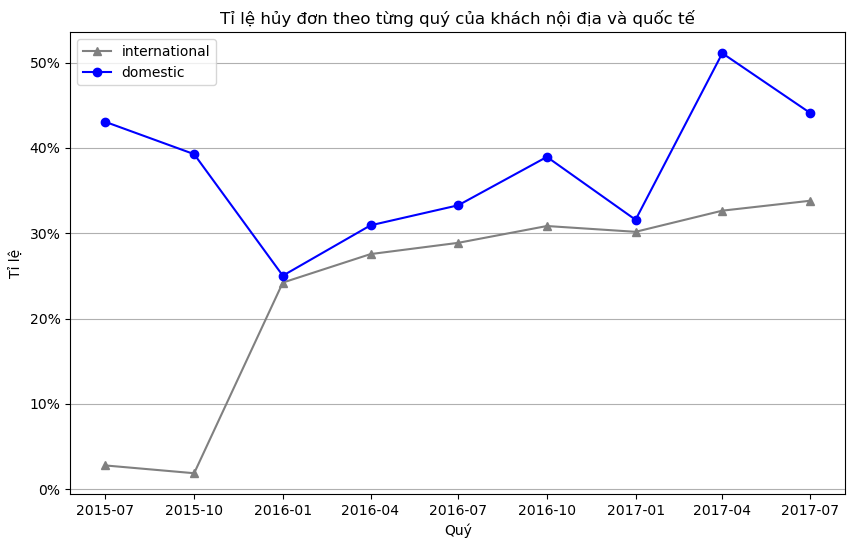

In [ ]:
def percent(x, pos):
    return f"{x:.0f}%"


cancel_ratio["quarter_year_tst"] = cancel_ratio["quarter_year"].dt.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["international"],
    label="international",
    marker="^",
    color="gray",
)
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["domestic"],
    label="domestic",
    marker="o",
    color="blue",
)


plt.title("Tỉ lệ hủy đơn theo từng quý của khách nội địa và quốc tế")
plt.grid(axis="y")
plt.ylabel("Tỉ lệ")
plt.xlabel("Quý")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))
plt.legend()
plt.show()


- Từ biểu đồ nhận thấy tỉ lệ hủy đơn qua các quý của khách nội địa cao hơn so với khách quốc tế


## Thực hiện kiểm định như sau:

- H0: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và quốc tế là như nhau
- H1: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế
- alpha = 0.05

- Lí do chọn 1 tuần mà không phải 1 tháng hay quý: để khảo sát ở khoảng thời gian hẹp hơn khi đó có nhiều mẫu để thực hiện kiểm định


### Tính số đơn hủy qua các tuần của khách nội địa và khách quốc tế


In [ ]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = df_canceled.groupby(["is_domestic", "week_year"]).size().unstack()

num_canceled_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,NaN,1.0,1.0,2.0,3.0,3.0,7.0,2.0,3.0,1.0,...,200.0,189.0,197.0,154.0,192.0,188.0,195.0,212.0,135.0,67.0
True,36.0,59.0,53.0,56.0,27.0,41.0,53.0,57.0,46.0,45.0,...,45.0,49.0,38.0,26.0,54.0,38.0,43.0,55.0,52.0,19.0


### Lấp các giá trị nan bằng 0


In [ ]:
num_canceled_order = num_canceled_order.fillna(0)


### Tính số đơn qua các tuần của khách nội địa và khách quốc tế


In [ ]:
num_order = df.groupby(["is_domestic", "week_year"]).size().unstack()

num_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,NaN,1.0,1.0,13.0,35.0,112.0,155.0,150.0,89.0,216.0,...,587.0,575.0,584.0,511.0,549.0,533.0,523.0,581.0,461.0,201.0
True,52.0,81.0,76.0,105.0,52.0,116.0,166.0,130.0,121.0,135.0,...,93.0,108.0,100.0,62.0,108.0,89.0,103.0,125.0,97.0,61.0


### Lấp các giá trị nan bằng 0


In [ ]:
num_order = num_order.fillna(0)


### Tỉ lệ hủy đơn qua các tuần của khách nội địa và khách quốc tế


In [ ]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,NaN,100.00,100.00,15.38,8.57,2.68,4.52,1.33,3.37,0.46,...,34.07,32.87,33.73,30.14,34.97,35.27,37.28,36.49,29.28,33.33
True,69.23,72.84,69.74,53.33,51.92,35.34,31.93,43.85,38.02,33.33,...,48.39,45.37,38.00,41.94,50.00,42.70,41.75,44.00,53.61,31.15


### Kiểm tra có giá trị nan không


In [ ]:
null_values = cancel_ratio.applymap(lambda x: pd.isnull(x)).stack()


null_values = null_values[null_values]

null_values


is_domestic  week_year            
False        2015-06-29/2015-07-05    True
dtype: bool

- Lí do có giá trị nan là tại thời điểm đó, không có đơn đặt nên mẫu không tồn tại


### Tiến hành bỏ mẫu không hợp lệ đi


In [ ]:
def drop_na_in_list(lst):
    lst = pd.Series(lst)
    lst = lst.dropna()
    return list(lst)


cancel_ratio = cancel_ratio.apply(lambda x: x.tolist(), axis=1)

cancel_ratio = cancel_ratio.apply(lambda x: drop_na_in_list(x))

cancel_ratio


is_domestic
False    [100.0, 100.0, 15.38, 8.57, 2.68, 4.52, 1.33, ...
True     [69.23, 72.84, 69.74, 53.33, 51.92, 35.34, 31....
dtype: object

### Tính trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và khách quốc tế


In [ ]:
mean_by_origin = cancel_ratio.apply(lambda x: np.mean(x))
mean_by_origin


is_domestic
False    25.082832
True     37.829649
dtype: float64

### Tạo hàm tính thống kê kiểm định


In [ ]:
def get_statistic(sample_a, sample_b):
    return np.mean(sample_a) - np.mean(sample_b)


### Thực hiện kiểm định bằng permutation test


In [ ]:
p_value = stats.permutation_test(
    (cancel_ratio[True], cancel_ratio[False]),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
).pvalue

p_value


9.99999000001e-07

- Giá trị p_value < 0.05 nên có cơ sở khẳng định trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế

- Từ biểu đồ tỉ lệ hủy đơn theo quý và kết quả kiểm định như trên, có thể khẳng định rằng khách nội địa có xu hướng hủy đơn nhiều hơn so với khách quốc tế

- Ý nghĩa: Việc khách nội địa có xu hướng hủy đơn nhiều hơn chứng tỏ dịch vụ của khách sạn vẫn chưa thực sự tốt, chính vì vậy, khách sạn cần cải thiện chất lượng dịch vụ để đáp ứng với yêu cầu của khách nội địa tốt hơn, vì thị trường nội địa đóng vai trò quan trọng trong sự phát triển của khách sạn.


# Thời điểm nào khách hàng có khả năng đặt phòng như ý nhiều nhất (ước lượng tháng độ tin cậy 95%)


## Tính số đơn như ý theo từng tháng


In [ ]:
df["month"] = df["arrival_date"].dt.month

df_assign_like_order = df[df["assigned_room_type"] == df["reserved_room_type"]]

num_order_assign_like_order_by_month = (
    df_assign_like_order["month"].value_counts().sort_index()
)

num_order_assign_like_order_by_month


1     2498
2     3186
3     4271
4     4583
5     4869
6     4561
7     5225
8     5979
9     3442
10    3537
11    2529
12    2638
Name: month, dtype: int64

## Tính số đơn theo từng tháng


In [ ]:
num_order_by_month = df["month"].value_counts().sort_index()

num_order_by_month


1     2730
2     3604
3     4854
4     5078
5     5411
6     5004
7     5741
8     6586
9     4238
10    4208
11    2942
12    3014
Name: month, dtype: int64

## Tỉ lệ phần trăm đơn đặt được như ý theo từng tháng


In [ ]:
percent_num_order_assign_like_order_by_month = (
    num_order_assign_like_order_by_month / num_order_by_month * 100
)
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.round(2)
)


percent_num_order_assign_like_order_by_month


1     91.50
2     88.40
3     87.99
4     90.25
5     89.98
6     91.15
7     91.01
8     90.78
9     81.22
10    84.05
11    85.96
12    87.52
Name: month, dtype: float64

## Gộp lại thành bảng


In [ ]:
num_order_assign_like_order_by_month = num_order_assign_like_order_by_month.to_frame(
    name="num_order_assign_like_order"
)
num_order_by_month = num_order_by_month.to_frame(name="num_order")
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.to_frame(name="percent")
)

table = pd.concat(
    [
        num_order_assign_like_order_by_month,
        num_order_by_month,
        percent_num_order_assign_like_order_by_month,
    ],
    axis=1,
)

table


,num_order_assign_like_order,num_order,percent
1,2498,2730,91.50
2,3186,3604,88.40
3,4271,4854,87.99
4,4583,5078,90.25
5,4869,5411,89.98
6,4561,5004,91.15
7,5225,5741,91.01
8,5979,6586,90.78
9,3442,4238,81.22
10,3537,4208,84.05


## Tìm khoảng tin cậy cho tỉ lệ đơn như ý theo từng tháng


### Tìm số đơn đặt không như ý theo từng tháng


In [ ]:
table["num_order_assign_not_like_order"] = (
    table["num_order"] - table["num_order_assign_like_order"]
)


### Tạo danh sách gồm 2 số 1 và 0, 1: như ý và 0: không như ý


In [ ]:
# 1: đơn được như ý và 0: là không như ý
list_1_by_month = table["num_order_assign_like_order"].apply(lambda x: [1] * x)
list_0_by_month = table["num_order_assign_not_like_order"].apply(lambda x: [0] * x)

list_1_and_0_by_month = list_1_by_month + list_0_by_month

list_1_and_0_by_month


1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
5     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
6     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
7     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
8     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
9     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
10    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
11    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
12    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
dtype: object

### Thực hiện ước lượng khoảng tin cậy cho tỉ lệ đặt đơn như ý trong từng tháng


In [ ]:
def get_ci_for_ratio(sample):
    res = stats.bootstrap(
        (sample,), np.mean, confidence_level=0.95, n_resamples=100000
    ).confidence_interval

    res = [round(item * 100, 2) for item in res]

    return res


ci_for_ratio_by_month = list_1_and_0_by_month.apply(lambda x: get_ci_for_ratio(x))

ci_for_ratio_by_month


1      [90.4, 92.49]
2     [87.32, 89.43]
3     [87.06, 88.88]
4     [89.41, 91.04]
5     [89.15, 90.76]
6     [90.35, 91.91]
7     [90.25, 91.73]
8     [90.07, 91.47]
9     [80.01, 82.37]
10    [82.91, 85.15]
11    [84.67, 87.19]
12     [86.3, 88.69]
dtype: object

### Tổng hợp vào trong bảng


In [ ]:
table["lower_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[0])
table["upper_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[1])

table


,num_order_assign_like_order,num_order,percent,num_order_assign_not_like_order,lower_ratio_bound,upper_ratio_bound
1,2498,2730,91.50,232,90.40,92.49
2,3186,3604,88.40,418,87.32,89.43
3,4271,4854,87.99,583,87.06,88.88
4,4583,5078,90.25,495,89.41,91.04
5,4869,5411,89.98,542,89.15,90.76
6,4561,5004,91.15,443,90.35,91.91
7,5225,5741,91.01,516,90.25,91.73
8,5979,6586,90.78,607,90.07,91.47
9,3442,4238,81.22,796,80.01,82.37
10,3537,4208,84.05,671,82.91,85.15


## Vẽ biểu đồ minh họa cho khoảng tin cậy 95% tỉ lệ đặt đơn như ý theo từng tháng và biểu đồ số đơn đặt theo từng tháng


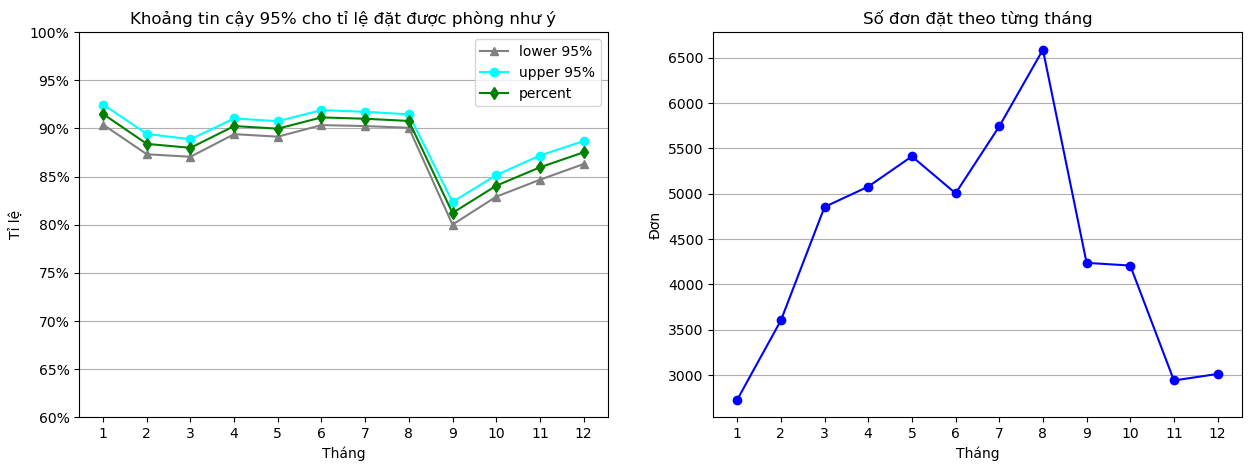

In [ ]:
def percent(x, pos):
    return f"{x:.0f}%"


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Vẽ biểu đồ khoảng tin cậy cho tỉ lệ
ax = axes[0]
ax.plot(
    table.index, table["lower_ratio_bound"], marker="^", label="lower 95%", color="grey"
)
ax.plot(
    table.index, table["upper_ratio_bound"], marker="o", label="upper 95%", color="cyan"
)
ax.plot(table.index, table["percent"], marker="d", label="percent", color="green")


ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Tỉ lệ")
ax.set_title("Khoảng tin cậy 95% cho tỉ lệ đặt được phòng như ý")
ax.legend()
ax.grid(axis="y")
ax.set_ylim(60, 100)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(percent))

# Vẽ biểu đồ số đơn đặt theo từng tháng
ax = axes[1]
ax.plot(table.index, table["num_order"], marker="o", color="blue")

ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Đơn")
ax.set_title("Số đơn đặt theo từng tháng")
ax.grid(axis="y")

plt.show()


- Từ biểu đồ, ta thấy khả năng đặt được phòng như ý từ tháng 1 đến tháng 8 khá ổn định quanh mức 90%, khá ấn tượng, còn đối với khoảng thời gian cuối năm khả năng đặt được phòng nhìn chung giảm, điều này chứng tỏ với vai trò là khách hàng, nên xem xét việc đặt khách sạn ở khoảng thời gian đầu năm để việc đặt phòng được như ý, qua đó tăng tính trải nghiệm cho chuyến đi

- Với vai trò là khách sạn, cần tìm hiểu nguyên nhân tại sao ở thời điểm cuối năm, số đơn đặt phòng ít nhưng tỉ lệ đặt phòng như ý là thấp hơn so với khoảng thời gian trước đó, đặc biệt tháng 6, 7, 8 khi đó số đơn đặt nhiều hơn nhưng tỉ lệ đặt phòng như ý lại cao. Qua đó khách sạn cần cải thiện chất lượng phục vụ khách hàng, tăng tỉ lệ đặt phòng như ý nhằm đảm bảo sự hài lòng của khách hàng ở mức cao nhất


# Khách hàng thích đến vào ngày trong tuần hay cuối tuần ?


## Tạo cột is_weekend: Ngày đến có phải là vào cuối tuần


In [ ]:
df["week_day"] = df["arrival_date"].dt.weekday

df["is_weekend"] = df["week_day"].isin([5, 6]).astype("int")

df["is_weekend"]


0        0
1        0
2        0
3        0
4        0
        ..
53405    0
53406    0
53407    0
53408    0
53409    0
Name: is_weekend, Length: 53410, dtype: int32

## Tính số đơn đặt theo từng tuần


In [ ]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

num_order_by_week = df["week_year"].value_counts().sort_index()
num_order_by_week


2015-06-29/2015-07-05     52
2015-07-06/2015-07-12     82
2015-07-13/2015-07-19     77
2015-07-20/2015-07-26    118
2015-07-27/2015-08-02     87
                        ... 
2017-07-31/2017-08-06    622
2017-08-07/2017-08-13    626
2017-08-14/2017-08-20    706
2017-08-21/2017-08-27    558
2017-08-28/2017-09-03    262
Freq: W-SUN, Name: week_year, Length: 114, dtype: int64

## Chuyển thành bảng


In [ ]:
num_order_by_week = num_order_by_week.to_frame(name="count").reset_index(names="week")

num_order_by_week


,week,count
0,2015-06-29/2015-07-05,52
1,2015-07-06/2015-07-12,82
2,2015-07-13/2015-07-19,77
3,2015-07-20/2015-07-26,118
4,2015-07-27/2015-08-02,87
...,...,...
109,2017-07-31/2017-08-06,622
110,2017-08-07/2017-08-13,626
111,2017-08-14/2017-08-20,706
112,2017-08-21/2017-08-27,558


## Tính số đơn đặt vào cuối tuần theo từng tuần


In [ ]:
df_weekend = df[df["is_weekend"] == 1]

num_weekend_order_by_week = df_weekend["week_year"].value_counts().sort_index()
num_weekend_order_by_week


2015-06-29/2015-07-05     18
2015-07-06/2015-07-12     21
2015-07-13/2015-07-19     26
2015-07-20/2015-07-26     48
2015-07-27/2015-08-02     21
                        ... 
2017-07-24/2017-07-30    190
2017-07-31/2017-08-06    143
2017-08-07/2017-08-13    184
2017-08-14/2017-08-20    192
2017-08-21/2017-08-27    179
Freq: W-SUN, Name: week_year, Length: 113, dtype: int64

## Chuyển thành bảng


In [ ]:
num_weekend_order_by_week = num_weekend_order_by_week.to_frame(
    name="count"
).reset_index(names="week")

num_weekend_order_by_week


,week,count
0,2015-06-29/2015-07-05,18
1,2015-07-06/2015-07-12,21
2,2015-07-13/2015-07-19,26
3,2015-07-20/2015-07-26,48
4,2015-07-27/2015-08-02,21
...,...,...
108,2017-07-24/2017-07-30,190
109,2017-07-31/2017-08-06,143
110,2017-08-07/2017-08-13,184
111,2017-08-14/2017-08-20,192


## Gộp lại thành 1 bảng


In [ ]:
num_weekend_order_by_week = num_weekend_order_by_week.rename(
    columns={"count": "weekend_count"}
)

table_by_week = pd.merge(
    num_order_by_week, num_weekend_order_by_week, on="week", how="left"
)

table_by_week


,week,count,weekend_count
0,2015-06-29/2015-07-05,52,18.0
1,2015-07-06/2015-07-12,82,21.0
2,2015-07-13/2015-07-19,77,26.0
3,2015-07-20/2015-07-26,118,48.0
4,2015-07-27/2015-08-02,87,21.0
...,...,...,...
109,2017-07-31/2017-08-06,622,143.0
110,2017-08-07/2017-08-13,626,184.0
111,2017-08-14/2017-08-20,706,192.0
112,2017-08-21/2017-08-27,558,179.0


## Lấp các giá trị nan trong cột weekend_count bằng 0


In [ ]:
table_by_week["weekend_count"] = table_by_week["weekend_count"].fillna(0)


## Tính cột tỉ lệ phần trăm


In [ ]:
table_by_week["percent"] = table_by_week["weekend_count"] / table_by_week["count"] * 100
table_by_week["percent"] = table_by_week["percent"].round(2)

table_by_week


,week,count,weekend_count,percent
0,2015-06-29/2015-07-05,52,18.0,34.62
1,2015-07-06/2015-07-12,82,21.0,25.61
2,2015-07-13/2015-07-19,77,26.0,33.77
3,2015-07-20/2015-07-26,118,48.0,40.68
4,2015-07-27/2015-08-02,87,21.0,24.14
...,...,...,...,...
109,2017-07-31/2017-08-06,622,143.0,22.99
110,2017-08-07/2017-08-13,626,184.0,29.39
111,2017-08-14/2017-08-20,706,192.0,27.20
112,2017-08-21/2017-08-27,558,179.0,32.08


## Ước lượng khoảng tin cậy cho trung bình tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần


In [ ]:
ci = stats.bootstrap(
    (table_by_week["percent"],),
    np.mean,
    confidence_level=0.95,
    n_resamples=1000000,
    method="percentile",
).confidence_interval

ci = [round(item, 2) for item in ci]

ci


[25.88, 28.27]

- Ý nghĩa: Như vậy khoảng tin cậy cho tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần là hoàn toàn nhỏ hơn 50%, từ đó kết luận khách hàng có xu hướng đặt đơn vào ngày trong tuần từ thứ Hai đến thứ Sáu, điều này giúp khách sạn có thể phân bổ nguồn lực hợp lí hơn, tập trung nhiều hơn vào các ngày trong tuần để phục vụ khách hàng tốt hơn, qua đó tăng sự thỏa mãn của khách hàng đối với dịch vụ của khách sạn.


# Kênh phân phối nào đóng góp doanh thu nhiều nhất (tính theo từng tháng, vẽ biểu đồ miền)


## Tính lợi nhuận của từng kênh phân phối theo từng tháng


In [ ]:
df_defined_not_canceled = df[
    (df["distribution_channel"] != "Undefined") & (df["is_canceled"] == 0)
]
df_defined_not_canceled["month"] = df_defined_not_canceled["arrival_date"].dt.month

revenue_by_month = (
    df_defined_not_canceled.groupby(["month", "distribution_channel"])["revenue"]
    .sum()
    .unstack()
)

revenue_by_month = revenue_by_month.fillna(0)

revenue_by_month


distribution_channel,Corporate,Direct,GDS,TA/TO
month,,,,
1,20425.09,63124.42,2071.50,393765.54
2,18338.99,92471.59,2772.99,568563.71
3,29368.03,100619.01,1747.20,827002.09
4,28728.80,156961.15,1259.00,983973.29
5,72854.89,144849.59,4698.60,1079691.27
6,57713.66,147789.58,4563.00,1016784.23
7,21868.99,200019.76,1594.99,1238343.14
8,17537.00,282002.55,853.00,1437918.09
9,37924.55,118763.09,1317.00,896868.10


## Tính tỉ lệ phần trăm lợi nhuận của từng kênh phân phối theo từng tháng


In [ ]:
revenue_by_month_pct = (
    revenue_by_month.divide(revenue_by_month.sum(axis=1), axis=0) * 100
)
revenue_by_month_pct


distribution_channel,Corporate,Direct,GDS,TA/TO
month,,,,
1,4.260672,13.167749,0.432115,82.139463
2,2.688421,13.555957,0.406509,83.349113
3,3.063202,10.494962,0.182240,86.259597
4,2.453519,13.404917,0.107522,84.034042
5,5.595208,11.124354,0.360849,82.919588
6,4.704213,12.046259,0.371928,82.877600
7,1.496004,13.682862,0.109109,84.712024
8,1.008853,16.222794,0.049071,82.719283
9,3.595178,11.258523,0.124849,85.021450


## Vẽ biểu đồ miền


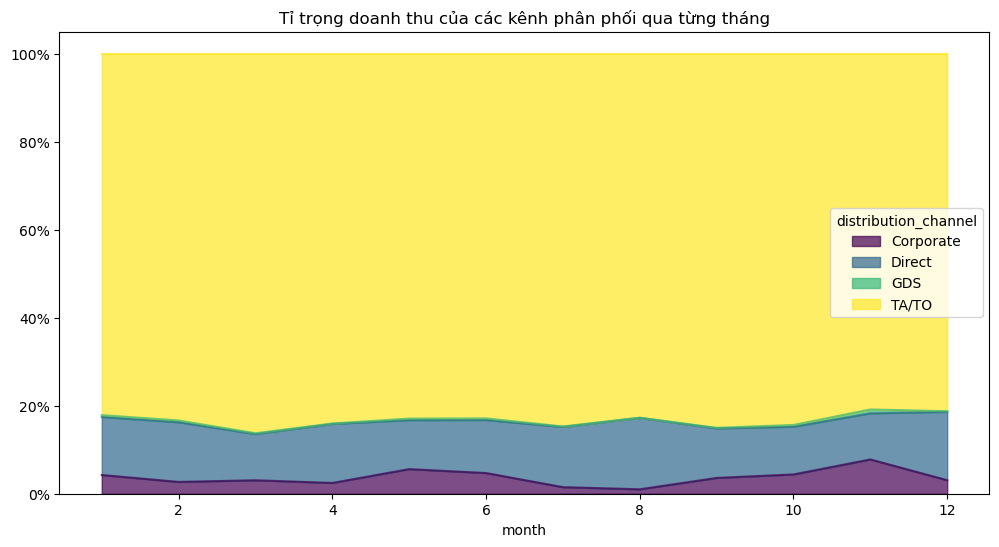

In [ ]:
revenue_by_month_pct.plot(
    kind="area", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.7
)
plt.title("Tỉ trọng doanh thu của các kênh phân phối qua từng tháng")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))

plt.show()


- Từ biểu đồ, ta kết luận được kênh phân phối TA/TO đóng góp phần lớn tỉ trọng vào doanh thu của khách sạn, như vậy khách sạn cần tập trung đầu tư vào kênh này để thu hút được nhiều khách hàng hơn


# So sánh tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn và không có


## Tạo thống kê cho khách hàng có tiền sử hủy đơn và không có


In [ ]:
df["did_cancel"] = (df["previous_cancellations"] > 0).astype("int")

num_order = df.groupby(["is_canceled", "did_cancel"]).size().unstack()

num_order


did_cancel,0,1
is_canceled,,
0,36997,370
1,15235,808


## Tính tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn và không có


In [ ]:
num_order_t = num_order.T.copy()

num_order_t["percent"] = num_order_t[1] / (num_order_t[0] + num_order_t[1]) * 100
num_order_t = num_order_t["percent"]
num_order_t


did_cancel
0    29.167943
1    68.590832
Name: percent, dtype: float64

## Thực hiện kiểm định:

- H0: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn = không có
- H1: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn > không có


In [ ]:
def get_statistic(x, y):
    return np.mean(x) - np.mean(y)


list_10_did_cancel_in_past = [1] * num_order.loc[1, 1] + [0] * num_order.loc[0, 1]
list_10_not_did_cancel_in_past = [1] * num_order.loc[1, 0] + [0] * num_order.loc[0, 0]

p_value = 0

for i in range(10):
    result = stats.permutation_test(
        (list_10_did_cancel_in_past, list_10_not_did_cancel_in_past),
        statistic=get_statistic,
        n_resamples=10000,
        alternative="greater",
    ).pvalue

    p_value += result

p_value = p_value / 10
p_value


9.99900009999e-05

- Ý nghĩa: p_value nhỏ hơn alpha nên có cơ sở khằng định tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn lớn hơn khách hàng không có, như vậy khách sạn cần tập trung cải tiến chất lượng phục vụ của mình, xem xét những điểm yếu cần khắc phục để tránh tình trạng khách hàng có tiền sử hủy đơn trước đây vẫn tiếp tục hủy đơn, gây ảnh hưởng đến danh tiếng và doanh thu của khách sạn.
